In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,multilabel_confusion_matrix,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


# from sklearn.metrics._classification import _nanaverage

def naive_bayes_search(df1, df2,seed_value=22):
    X_train, X_test, Y_train, Y_test = train_test_split(df1, df2, test_size=0.3,random_state=seed_value)
    
    gnb = GaussianNB()
    gnb.fit(X_train, Y_train)
    
    predicted = gnb.predict(X_test)
    predicted_probs = gnb.predict_proba(X_test)
    
    # cross_val_scores = cross_val_score(gnb, X_train, Y_train, cv=5)  
    # print("Cross-Validation Scores:", cross_val_scores)
    # print("Mean CV Score:", cross_val_scores.mean())


    # train_sizes, train_scores, test_scores = learning_curve(gnb, X_train, Y_train, cv=5)
    # train_scores_mean = np.mean(train_scores, axis=1)
    # test_scores_mean = np.mean(test_scores, axis=1)

    # plt.figure()
    # plt.title("Learning Curves")
    # plt.xlabel("Training examples")
    # plt.ylabel("Score")
    # plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    # plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    # plt.legend(loc="best")
    # plt.show()

    accuracy = accuracy_score(Y_test,predicted )
    f1 = f1_score(predicted, Y_test, average="weighted")
    conf_matrix = confusion_matrix(predicted, Y_test)
    precision = precision_score(Y_test, predicted, average="weighted",zero_division=1)
    recall = recall_score(Y_test, predicted, average="weighted")
    # roc = roc_auc_score(Y_test, predicted_probs, multi_class="ovr", average="weighted")
    conf_matrices = multilabel_confusion_matrix(Y_test, predicted)
    tp = conf_matrices[:,1,1]
    fp = conf_matrices[:,0,1]
    tn = conf_matrices[:,0,0]
    fn = conf_matrices[:,1,0]
    # fpr = _nanaverage(fp/(tn + fp), tp + fn)
    # tnr = _nanaverage(tn/(tn + fp), tp + fn)

    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall/Sensitivity/True Positive Rate:", recall)
    # print("Specificity:", tnr)
    # print("False Positive Rate:", fpr)
    # print("Area under ROC curve:", roc)
    print("Confusion Matrix:\n", conf_matrix)

    return predicted





In [5]:
import pandas as pd
merged_data = pd.read_csv('processed_df_new.csv')
# merged_data=pd.read_csv('Dataset/x_train_all.csv')
ytrainall = pd.read_csv('Dataset/y_train_all.csv')
merged_data = pd.concat([merged_data,ytrainall],axis = 1)
merged_data=merged_data.rename(columns={merged_data.columns[-1]:'label'})
# merged_data=merged_data.rename(columns={merged_data.columns[0]:'labels'})
# merged_data=merged_data.drop(columns =['labels'])
merged_data.columns.values[0] = '0'

In [6]:
merged_data.head()


,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,label
0,113,99,92,106,114,123,148,182,190,170,...,177,106,71,68,120,197,234,220,191,0
1,106,106,113,120,110,114,114,120,141,120,...,135,105,144,159,151,171,205,170,135,0
2,85,92,128,142,166,189,166,141,131,135,...,135,121,144,128,85,71,85,142,170,0
3,57,64,78,106,128,165,138,76,69,120,...,99,67,97,138,160,147,106,71,64,0
4,120,113,92,92,115,123,128,106,105,128,...,99,112,127,148,158,154,128,128,128,0


In [7]:
from sklearn.svm import SVC

x = merged_data.drop('label',axis=1)
y = merged_data['label']

svm = SVC(kernel='linear', decision_function_shape='ovr')

svm.fit(x, y)

SVC(kernel='linear')

In [8]:
feature_weights = svm.coef_


In [9]:
import numpy as np
k = 20
selected_features_per_class = {}
for class_label in range(10): 
    feature_ranking = np.argsort(np.abs(feature_weights[class_label]))
    selected_features = feature_ranking[:k]
    selected_features_per_class[class_label] = selected_features

print(selected_features_per_class)

{0: array([ 375, 2259,  260, 1259, 2234,  621, 1373,  519, 1867, 1865,   24,
       1461, 1728, 1114,  282,  278, 2175,  247, 2026,  360], dtype=int64), 1: array([ 461,  924, 2129,  692, 1734, 1773, 1255, 1401,  573, 1229, 1661,
        401,  437,  299,  450, 1771, 1204,  298,  606, 1417], dtype=int64), 2: array([ 600, 1642,  352,   37,  957, 2184,  677,  508, 1982, 1865,  287,
        711, 1434,  823,  118, 2069,  271, 1326, 1778,  800], dtype=int64), 3: array([1060, 1488, 1014, 1077,  946, 1715,  604, 1684,  356,  186,  472,
       1170,  589, 2020,  390,  539, 1853, 1062, 2255, 1151], dtype=int64), 4: array([1855, 1052,  474,    3, 1323, 2303, 2292,  724, 1866, 1430,  929,
        190,  265,  708, 2254,  296,  680,  649, 1880, 2007], dtype=int64), 5: array([1097, 2015, 2296, 1144,   75,  367,  724,  109,  318, 2206,  291,
       1818, 2127, 1898,  290,  354,  135,  194, 2012,  269], dtype=int64), 6: array([1526,  839, 2177,  659, 1905,  398, 1990, 1913, 1580,  491, 1733,
       1590

In [17]:
xtrain = pd.read_csv('processed_df_new.csv')
# xtrain = pd.read_csv('Dataset/x_train_all.csv')
# xtrain = xtrain.rename(columns={xtrain.columns[0]:'labels'})
# xtrain = xtrain.drop(columns=['labels'])
ytrain0 = pd.read_csv('y_train_0.csv')
ytrain3 = pd.read_csv('y_train_3.csv')
ytrain1 = pd.read_csv('y_train_1.csv')
ytrain2 = pd.read_csv('y_train_2.csv')
ytrain4 = pd.read_csv('y_train_4.csv')
ytrain5 = pd.read_csv('y_train_5.csv')
ytrain6 = pd.read_csv('y_train_6.csv')
ytrain7 = pd.read_csv('y_train_7.csv')
ytrain8 = pd.read_csv('y_train_8.csv')
ytrain9 = pd.read_csv('y_train_9.csv')

In [18]:
xtrain


,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,113,99,92,106,114,123,148,182,190,170,...,182,177,106,71,68,120,197,234,220,191
1,106,106,113,120,110,114,114,120,141,120,...,142,135,105,144,159,151,171,205,170,135
2,85,92,128,142,166,189,166,141,131,135,...,171,135,121,144,128,85,71,85,142,170
3,57,64,78,106,128,165,138,76,69,120,...,176,99,67,97,138,160,147,106,71,64
4,120,113,92,92,115,123,128,106,105,128,...,101,99,112,127,148,158,154,128,128,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,227,220,198,191,211,232,224,207,206,198,...,110,50,42,49,36,30,39,78,78,71
9686,92,120,170,198,164,120,110,116,138,156,...,147,120,98,66,50,59,86,135,156,156
9687,255,248,227,198,194,205,202,205,222,234,...,84,71,81,90,106,139,166,184,177,177
9688,212,212,227,227,243,250,238,215,214,227,...,87,50,46,81,124,132,108,57,42,50


In [19]:
xy0_20 = None
for i in selected_features_per_class[0]:
    xy0_20 = pd.concat([xy0_20,xtrain.iloc[:,int(i)]],axis=1)
xy0_20 = pd.concat([xy0_20,ytrain0],axis=1)
xy0_20 = xy0_20.rename(columns={xy0_20.columns[-1]:'label'})
print(xy0_20)
    
xy1_20 = None
for i in selected_features_per_class[1]:
    xy1_20 = pd.concat([xy1_20,xtrain.iloc[:,int(i)]],axis=1)
xy1_20 = pd.concat([xy1_20,ytrain1],axis=1)
xy1_20 = xy1_20.rename(columns={xy1_20.columns[-1]:'label'})
print(xy1_20)

xy2_20 = None
for i in selected_features_per_class[2]:
    xy2_20 = pd.concat([xy2_20,xtrain.iloc[:,int(i)]],axis=1)
xy2_20 = pd.concat([xy2_20,ytrain2],axis=1)
xy2_20 = xy2_20.rename(columns={xy2_20.columns[-1]:'label'})
print(xy2_20)

xy3_20 = None
for i in selected_features_per_class[3]:
    xy3_20 = pd.concat([xy3_20,xtrain.iloc[:,int(i)]],axis=1)
xy3_20 = pd.concat([xy3_20,ytrain3],axis=1)
xy3_20 = xy3_20.rename(columns={xy3_20.columns[-1]:'label'})
print(xy3_20)

xy4_20 = None
for i in selected_features_per_class[4]:
    xy4_20 = pd.concat([xy4_20,xtrain.iloc[:,int(i)]],axis=1)
xy4_20 = pd.concat([xy4_20,ytrain4],axis=1)
xy4_20 = xy4_20.rename(columns={xy4_20.columns[-1]:'label'})
print(xy4_20)

xy5_20 = None
for i in selected_features_per_class[5]:
    xy5_20 = pd.concat([xy5_20,xtrain.iloc[:,int(i)]],axis=1)
xy5_20 = pd.concat([xy5_20,ytrain5],axis=1)
xy5_20 = xy5_20.rename(columns={xy5_20.columns[-1]:'label'})
print(xy5_20)

xy6_20 = None
for i in selected_features_per_class[6]:
    xy6_20 = pd.concat([xy6_20,xtrain.iloc[:,int(i)]],axis=1)
xy6_20 = pd.concat([xy6_20,ytrain6],axis=1)
xy6_20 = xy6_20.rename(columns={xy6_20.columns[-1]:'label'})
print(xy6_20)

xy7_20 = None
for i in selected_features_per_class[7]:
    xy7_20 = pd.concat([xy7_20,xtrain.iloc[:,int(i)]],axis=1)
xy7_20 = pd.concat([xy7_20,ytrain7],axis=1)
xy7_20 = xy7_20.rename(columns={xy7_20.columns[-1]:'label'})
print(xy7_20)

xy8_20 = None
for i in selected_features_per_class[8]:
    xy8_20 = pd.concat([xy8_20,xtrain.iloc[:,int(i)]],axis=1)
xy8_20 = pd.concat([xy8_20,ytrain8],axis=1)
xy8_20 = xy8_20.rename(columns={xy8_20.columns[-1]:'label'})
print(xy8_20)

xy9_20 = None
for i in selected_features_per_class[9]:
    xy9_20 = pd.concat([xy9_20,xtrain.iloc[:,int(i)]],axis=1)
xy9_20 = pd.concat([xy9_20,ytrain9],axis=1)
xy9_20 = xy9_20.rename(columns={xy9_20.columns[-1]:'label'})
print(xy9_20)

    


      375  2259  260  1259  2234  621  1373  519  1867  1865  ...  1461  1728  \
0      80    64  190    63   147   64   152  148   132   135  ...    85   124   
1      66    92  193   153   221  124   118  213   189   180  ...    88   134   
2     182    71  129   107   241   92   151  128   151   124  ...   124   145   
3      94    50  116    66   191  128   160  107    96    72  ...   216   163   
4      87    85  194    92   227   92   201  199   106    93  ...    71   248   
...   ...   ...  ...   ...   ...  ...   ...  ...   ...   ...  ...   ...   ...   
9685  163    28  230   140   189   82   236   87   195   165  ...    96   174   
9686  106   142  160   107   191   88   210  148   146   143  ...   106   124   
9687  196    78  180    99   197   46   216   69   175   134  ...    64   166   
9688  116    99  181   159   208  212   187   96   166   121  ...    78   102   
9689  167    50  147   128   207  106   177   31   177   137  ...    74   198   

      1114  282  278  2175 

In [20]:
xy0_10 = None
y=0
for i in selected_features_per_class[0]:
    if y >= 10:
        break
    xy0_10 = pd.concat([xy0_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy0_10 = pd.concat([xy0_10,ytrain0],axis=1)
xy0_10 = xy0_10.rename(columns={xy0_10.columns[-1]:'label'})
print(xy0_10)
    
xy1_10 = None
y=0
for i in selected_features_per_class[1]:
    if y >= 10:
        break
    xy1_10 = pd.concat([xy1_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy1_10 = pd.concat([xy1_10,ytrain1],axis=1)
xy1_10 = xy1_10.rename(columns={xy1_10.columns[-1]:'label'})
print(xy1_10)

xy2_10 = None
y=0
for i in selected_features_per_class[2]:
    if y >= 10:
        break
    xy2_10 = pd.concat([xy2_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy2_10 = pd.concat([xy2_10,ytrain2],axis=1)
xy2_10 = xy2_10.rename(columns={xy2_10.columns[-1]:'label'})
print(xy2_10)

xy3_10 = None
y=0
for i in selected_features_per_class[3]:
    if y >= 10:
        break
    xy3_10 = pd.concat([xy3_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy3_10 = pd.concat([xy3_10,ytrain3],axis=1)
xy3_10 = xy3_10.rename(columns={xy3_10.columns[-1]:'label'})
print(xy3_10)

xy4_10 = None
y=0
for i in selected_features_per_class[4]:
    if y >= 10:
        break
    xy4_10 = pd.concat([xy4_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy4_10 = pd.concat([xy4_10,ytrain4],axis=1)
xy4_10 = xy4_10.rename(columns={xy4_10.columns[-1]:'label'})
print(xy4_10)

xy5_10 = None
y=0
for i in selected_features_per_class[5]:
    if y >= 10:
        break
    xy5_10 = pd.concat([xy5_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy5_10 = pd.concat([xy5_10,ytrain5],axis=1)
xy5_10 = xy5_10.rename(columns={xy5_10.columns[-1]:'label'})
print(xy5_10)

xy6_10 = None
y=0
for i in selected_features_per_class[6]:
    if y >= 10:
        break
    xy6_10 = pd.concat([xy6_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy6_10 = pd.concat([xy6_10,ytrain6],axis=1)
xy6_10 = xy6_10.rename(columns={xy6_10.columns[-1]:'label'})
print(xy6_10)

xy7_10 = None
y=0
for i in selected_features_per_class[7]:
    if y >= 10:
        break
    xy7_10 = pd.concat([xy7_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy7_10 = pd.concat([xy7_10,ytrain7],axis=1)
xy7_10 = xy7_10.rename(columns={xy7_10.columns[-1]:'label'})
print(xy7_10)

xy8_10 = None
y=0
for i in selected_features_per_class[8]:
    if y >= 10:
        break
    xy8_10 = pd.concat([xy8_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy8_10 = pd.concat([xy8_10,ytrain8],axis=1)
xy8_10 = xy8_10.rename(columns={xy8_10.columns[-1]:'label'})
print(xy8_10)

xy9_10 = None
y=0
for i in selected_features_per_class[9]:
    if y >= 10:
        break
    xy9_10 = pd.concat([xy9_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy9_10 = pd.concat([xy9_10,ytrain9],axis=1)
xy9_10 = xy9_10.rename(columns={xy9_10.columns[-1]:'label'})
print(xy9_10)


      375  2259  260  1259  2234  621  1373  519  1867  1865  label
0      80    64  190    63   147   64   152  148   132   135      0
1      66    92  193   153   221  124   118  213   189   180      0
2     182    71  129   107   241   92   151  128   151   124      0
3      94    50  116    66   191  128   160  107    96    72      0
4      87    85  194    92   227   92   201  199   106    93      0
...   ...   ...  ...   ...   ...  ...   ...  ...   ...   ...    ...
9685  163    28  230   140   189   82   236   87   195   165      1
9686  106   142  160   107   191   88   210  148   146   143      1
9687  196    78  180    99   197   46   216   69   175   134      1
9688  116    99  181   159   208  212   187   96   166   121      1
9689  167    50  147   128   207  106   177   31   177   137      1

[9690 rows x 11 columns]
      461  924  2129  692  1734  1773  1255  1401  573  1229  label
0      71  100   132   42   161    88   190   175   71   194      1
1      99  126   191  

In [21]:
xy0_5 = None
y=0
for i in selected_features_per_class[0]:
    if y >= 5:
        break
    xy0_5 = pd.concat([xy0_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy0_5 = pd.concat([xy0_5,ytrain0],axis=1)
xy0_5 = xy0_5.rename(columns={xy0_5.columns[-1]:'label'})
print(xy0_5)
    
xy1_5 = None
y=0
for i in selected_features_per_class[1]:
    if y >= 5:
        break
    xy1_5 = pd.concat([xy1_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy1_5 = pd.concat([xy1_5,ytrain1],axis=1)
xy1_5 = xy1_5.rename(columns={xy1_5.columns[-1]:'label'})
print(xy1_5)

xy2_5 = None
y=0
for i in selected_features_per_class[2]:
    if y >= 5:
        break
    xy2_5 = pd.concat([xy2_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy2_5 = pd.concat([xy2_5,ytrain2],axis=1)
xy2_5 = xy2_5.rename(columns={xy2_5.columns[-1]:'label'})
print(xy2_5)

xy3_5 = None
y=0
for i in selected_features_per_class[3]:
    if y >= 5:
        break
    xy3_5 = pd.concat([xy3_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy3_5 = pd.concat([xy3_5,ytrain3],axis=1)
xy3_5 = xy3_5.rename(columns={xy3_5.columns[-1]:'label'})
print(xy3_5)

xy4_5 = None
y=0
for i in selected_features_per_class[4]:
    if y >= 5:
        break
    xy4_5 = pd.concat([xy4_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy4_5 = pd.concat([xy4_5,ytrain4],axis=1)
xy4_5 = xy4_5.rename(columns={xy4_5.columns[-1]:'label'})
print(xy4_5)

xy5_5 = None
y=0
for i in selected_features_per_class[5]:
    if y >= 5:
        break
    xy5_5 = pd.concat([xy5_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy5_5 = pd.concat([xy5_5,ytrain5],axis=1)
xy5_5 = xy5_5.rename(columns={xy5_5.columns[-1]:'label'})
print(xy5_5)

xy6_5 = None
y=0
for i in selected_features_per_class[6]:
    if y >= 5:
        break
    xy6_5 = pd.concat([xy6_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy6_5 = pd.concat([xy6_5,ytrain6],axis=1)
xy6_5 = xy6_5.rename(columns={xy6_5.columns[-1]:'label'})
print(xy6_5)

xy7_5 = None
y=0
for i in selected_features_per_class[7]:
    if y >= 5:
        break
    xy7_5 = pd.concat([xy7_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy7_5 = pd.concat([xy7_5,ytrain7],axis=1)
xy7_5 = xy7_5.rename(columns={xy7_5.columns[-1]:'label'})
print(xy7_5)

xy8_5 = None
y=0
for i in selected_features_per_class[8]:
    if y >= 5:
        break
    xy8_5 = pd.concat([xy8_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy8_5 = pd.concat([xy8_5,ytrain8],axis=1)
xy8_5 = xy8_5.rename(columns={xy8_5.columns[-1]:'label'})
print(xy8_5)

xy9_5 = None
y=0
for i in selected_features_per_class[9]:
    if y >= 5:
        break
    xy9_5 = pd.concat([xy9_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy9_5 = pd.concat([xy9_5,ytrain9],axis=1)
xy9_5 = xy9_5.rename(columns={xy9_5.columns[-1]:'label'})
print(xy9_5)


      375  2259  260  1259  2234  label
0      80    64  190    63   147      0
1      66    92  193   153   221      0
2     182    71  129   107   241      0
3      94    50  116    66   191      0
4      87    85  194    92   227      0
...   ...   ...  ...   ...   ...    ...
9685  163    28  230   140   189      1
9686  106   142  160   107   191      1
9687  196    78  180    99   197      1
9688  116    99  181   159   208      1
9689  167    50  147   128   207      1

[9690 rows x 6 columns]
      461  924  2129  692  1734  label
0      71  100   132   42   161      1
1      99  126   191   49    92      1
2     189   79   130  115   124      1
3     217   93   161  141    85      1
4      83   98   147   71   246      1
...   ...  ...   ...  ...   ...    ...
9685  163  223   150   68   117      1
9686  246  162   163   64   156      1
9687  168  183   145   43   140      1
9688  179  231   138   42   140      1
9689  182  136   108   64   161      1

[9690 rows x 6 columns]
  

In [22]:
y_train=xy0_5['label']
y_train

0       0
1       0
2       0
3       0
4       0
       ..
9685    1
9686    1
9687    1
9688    1
9689    1
Name: label, Length: 9690, dtype: int64

In [23]:
xy0_5

,375,2259,260,1259,2234,label
0,80,64,190,63,147,0
1,66,92,193,153,221,0
2,182,71,129,107,241,0
3,94,50,116,66,191,0
4,87,85,194,92,227,0
...,...,...,...,...,...,...
9685,163,28,230,140,189,1
9686,106,142,160,107,191,1
9687,196,78,180,99,197,1
9688,116,99,181,159,208,1


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

seed_value = 22
processed_df = xy9_20.drop(columns=['label'])
y_train = xy9_20['label']

X_train, X_test, Y_train, Y_test = train_test_split(processed_df, y_train, test_size=0.3, random_state=seed_value)

gnb = GaussianNB()

gnb.fit(X_train, Y_train)

predicted = gnb.predict(X_test)

In [25]:
accuracy = accuracy_score(predicted, Y_test)
f1 = f1_score(predicted, Y_test, average="weighted")
conf_matrix = confusion_matrix(predicted, Y_test)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9594083247334021
F1 Score: 0.9589088595511027
Confusion Matrix:
 [[  20   61]
 [  57 2769]]


In [26]:
y_train=xy0_5['label']
processed_df=xy0_5.drop(columns=['label'])
naive_bayes_search(processed_df,y_train)

Accuracy: 0.977640178878569
F1 Score: 0.9886936858584103
Precision: 0.9781401404791514
Recall/Sensitivity/True Positive Rate: 0.977640178878569
Confusion Matrix:
 [[   0    0]
 [  65 2842]]


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [27]:
for i in range(10):
    strings=globals()["xy{}_5".format(i)]
    print("The current Data frame is: ",i)
    y_train=strings['label']
    processed_df=strings.drop(columns=['label'])
    naive_bayes_search(processed_df,y_train)
    print("\n")

The current Data frame is:  0
Accuracy: 0.977640178878569
F1 Score: 0.9886936858584103
Precision: 0.9781401404791514
Recall/Sensitivity/True Positive Rate: 0.977640178878569
Confusion Matrix:
 [[   0    0]
 [  65 2842]]


The current Data frame is:  1
Accuracy: 0.7564499484004128
F1 Score: 0.8214138268047296
Precision: 0.6923353894561662
Recall/Sensitivity/True Positive Rate: 0.7564499484004128
Confusion Matrix:
 [[  64   86]
 [ 622 2135]]


The current Data frame is:  2
Accuracy: 0.7715858273133815
F1 Score: 0.8710679611650485
Precision: 0.8237588615974939
Recall/Sensitivity/True Positive Rate: 0.7715858273133815
Confusion Matrix:
 [[   0    0]
 [ 664 2243]]


The current Data frame is:  3
Accuracy: 0.8555211558307534
F1 Score: 0.9221357063403782
Precision: 0.8763952922432349
Recall/Sensitivity/True Positive Rate: 0.8555211558307534
Confusion Matrix:
 [[   0    0]
 [ 420 2487]]


The current Data frame is:  4
Accuracy: 0.7994496044031648
F1 Score: 0.8885490346014147
Precision: 0.83967

In [28]:
for i in range(10):
    strings=globals()["xy{}_10".format(i)]
    print("The current Data frame is: ",i)
    y_train=strings['label']
    processed_df=strings.drop(columns=['label'])
    naive_bayes_search(processed_df,y_train)
    print("\n")

The current Data frame is:  0
Accuracy: 0.9762641898864809
F1 Score: 0.986004328380703
Precision: 0.9597987456017623
Recall/Sensitivity/True Positive Rate: 0.9762641898864809
Confusion Matrix:
 [[   1    5]
 [  64 2837]]


The current Data frame is:  1
Accuracy: 0.7492260061919505
F1 Score: 0.788748706594703
Precision: 0.7012915812614519
Recall/Sensitivity/True Positive Rate: 0.7492260061919505
Confusion Matrix:
 [[ 127  170]
 [ 559 2051]]


The current Data frame is:  2
Accuracy: 0.7719298245614035
F1 Score: 0.8702942302431761
Precision: 0.7479701319414238
Recall/Sensitivity/True Positive Rate: 0.7719298245614035
Confusion Matrix:
 [[   2    1]
 [ 662 2242]]


The current Data frame is:  3
Accuracy: 0.8575851393188855
F1 Score: 0.9135574565567034
Precision: 0.8219788666038499
Recall/Sensitivity/True Positive Rate: 0.8575851393188855
Confusion Matrix:
 [[  19   13]
 [ 401 2474]]


The current Data frame is:  4
Accuracy: 0.7960096319229446
F1 Score: 0.8754016437218146
Precision: 0.71315

In [29]:
for i in range(10):
    strings=globals()["xy{}_20".format(i)]
    print("The current Data frame is: ",i)
    y_train=strings['label']
    processed_df=strings.drop(columns=['label'])
    naive_bayes_search(processed_df,y_train)
    print("\n")

The current Data frame is:  0
Accuracy: 0.9408324733402132
F1 Score: 0.9298227331223108
Precision: 0.9647425458869029
Recall/Sensitivity/True Positive Rate: 0.9408324733402132
Confusion Matrix:
 [[  20  127]
 [  45 2715]]


The current Data frame is:  1
Accuracy: 0.7227382180942552
F1 Score: 0.7358196617245677
Precision: 0.7006904522628736
Recall/Sensitivity/True Positive Rate: 0.7227382180942552
Confusion Matrix:
 [[ 205  325]
 [ 481 1896]]


The current Data frame is:  2
Accuracy: 0.7757137942896457
F1 Score: 0.8409554094212244
Precision: 0.7316272094422238
Recall/Sensitivity/True Positive Rate: 0.7757137942896457
Confusion Matrix:
 [[  67   55]
 [ 597 2188]]


The current Data frame is:  3
Accuracy: 0.8634330925352597
F1 Score: 0.8759573623682619
Precision: 0.8455012941638187
Recall/Sensitivity/True Positive Rate: 0.8634330925352597
Confusion Matrix:
 [[ 148  125]
 [ 272 2362]]


The current Data frame is:  4
Accuracy: 0.7574819401444789
F1 Score: 0.7699371669873262
Precision: 0.735

#### Victor 

In [30]:
features = []
for i in range(len(selected_features_per_class)):
    features.append(selected_features_per_class[i][0:20])
features = np.concatenate(features)
features = np.unique(features)
features = features.tolist()
for i in range(len(features)):
    features[i] = str(features[i])
features



['3',
 '24',
 '37',
 '75',
 '102',
 '109',
 '118',
 '135',
 '186',
 '190',
 '194',
 '213',
 '247',
 '260',
 '265',
 '269',
 '271',
 '278',
 '282',
 '287',
 '290',
 '291',
 '296',
 '298',
 '299',
 '318',
 '348',
 '352',
 '354',
 '356',
 '360',
 '366',
 '367',
 '375',
 '382',
 '390',
 '398',
 '401',
 '437',
 '450',
 '460',
 '461',
 '472',
 '474',
 '491',
 '498',
 '508',
 '519',
 '539',
 '573',
 '589',
 '593',
 '600',
 '604',
 '606',
 '621',
 '647',
 '649',
 '659',
 '662',
 '672',
 '677',
 '680',
 '685',
 '692',
 '708',
 '711',
 '724',
 '740',
 '798',
 '800',
 '814',
 '823',
 '839',
 '846',
 '847',
 '850',
 '872',
 '878',
 '917',
 '924',
 '929',
 '946',
 '957',
 '1014',
 '1044',
 '1052',
 '1060',
 '1062',
 '1064',
 '1077',
 '1096',
 '1097',
 '1098',
 '1099',
 '1114',
 '1144',
 '1151',
 '1161',
 '1170',
 '1191',
 '1204',
 '1222',
 '1229',
 '1247',
 '1255',
 '1259',
 '1323',
 '1326',
 '1357',
 '1373',
 '1401',
 '1417',
 '1430',
 '1434',
 '1437',
 '1449',
 '1461',
 '1488',
 '1526',
 '1536',


In [31]:
x_train = pd.read_csv('Dataset/x_train_all.csv')
y_train = pd.read_csv('Dataset/y_train_all.csv')
x_train

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,247.0,220.0,254.0,213.0,129.0,208.0,254.0,255.0,255.0,255.0,...,35.0,29.0,27.0,26.0,25.0,23.0,22.0,26.0,26.0,27.0
9686,151.0,118.0,254.0,255.0,255.0,255.0,254.0,254.0,254.0,252.0,...,37.0,31.0,30.0,30.0,30.0,30.0,29.0,26.0,28.0,27.0
9687,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,41.0,49.0,42.0,36.0,33.0,36.0,39.0,31.0,39.0,43.0
9688,255.0,253.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,38.0,27.0,26.0,27.0,35.0,28.0,27.0,26.0,26.0,24.0


In [32]:
reduced_x_train = xtrain[features]
reduced_x_train

,3,24,37,75,102,109,118,135,186,190,...,2206,2220,2234,2240,2254,2255,2259,2292,2296,2303
0,106,110,120,227,128,194,101,149,145,92,...,170,117,147,247,205,163,64,152,106,191
1,120,113,75,135,142,177,143,78,174,106,...,198,74,221,137,177,142,92,148,105,135
2,142,166,125,198,114,232,233,106,170,99,...,170,78,241,136,156,177,71,206,121,170
3,106,220,170,177,156,250,241,64,212,71,...,142,132,191,105,85,78,50,227,67,64
4,92,57,109,149,156,250,154,106,142,113,...,78,230,227,124,106,106,85,128,112,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,191,24,33,92,230,222,118,113,188,57,...,64,188,189,222,71,71,28,181,42,71
9686,198,234,255,205,152,101,136,149,142,234,...,106,192,191,184,142,149,142,195,98,156
9687,198,209,170,241,230,203,226,241,174,113,...,92,202,197,220,156,142,78,181,81,177
9688,227,170,227,92,223,163,192,120,113,85,...,71,181,208,216,50,64,99,181,46,50


In [33]:
naive_bayes_search(reduced_x_train, y_train)

c:\Users\anshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.43171654626762984
F1 Score: 0.4230720103662578
Precision: 0.49625079756666496
Recall/Sensitivity/True Positive Rate: 0.43171654626762984
Confusion Matrix:
 [[ 37 157  65  49  39   0   0   0   1   1]
 [ 11 223 130  29  43   0   3   0   3   0]
 [  7  57 214  66  31   0   1   1   2   3]
 [  2  57  61 144  50   0   3   3   0   1]
 [  4 143 139  66 351   2   4   1   2   3]
 [  0   1   8  26  19  49   1   9  16  11]
 [  2  17  27  22  27   2  67   1  23   8]
 [  0   4   4   0   4   3   2  43  22   6]
 [  1   4   3   0   2   2   7   1  92   9]
 [  1  23  13  18  17   7  16   6  17  35]]


array([1, 2, 4, ..., 3, 6, 1], dtype=int64)

In [88]:
# original_image = reduced_x_train.iloc[0].values.reshape(14, 14)
# plt.imshow(original_image, cmap='gray')

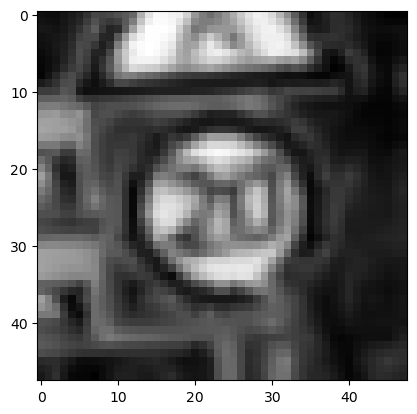

In [25]:
original_image = xtrain.iloc[0].values.reshape(48, 48)
plt.imshow(original_image, cmap='gray')

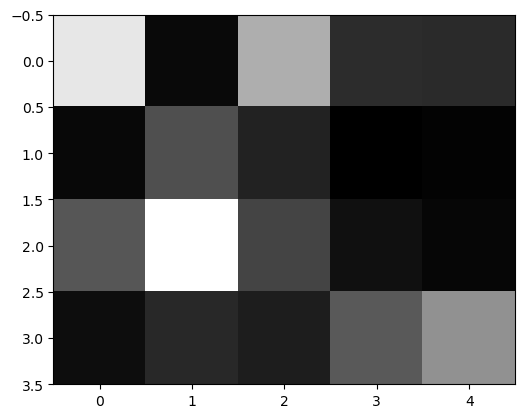

In [26]:
new = xy0_20.drop(columns=["label"])

original_image = new.iloc[0].values.reshape(4, 5)
plt.imshow(original_image, cmap='gray')

In [55]:
from sklearn.multiclass import OneVsRestClassifier
classifiers = [GaussianNB() for i in range(10)]
ovr = OneVsRestClassifier(GaussianNB())

X_train, X_test, Y_train, Y_test = train_test_split(reduced_x_train, ytrainall, test_size=0.3,random_state=seed_value)

ovr.fit(X_train, Y_train)
predicted = ovr.predict(X_test)
predicted_probs = ovr.predict_proba(X_test)

# cross_val_scores = cross_val_score(gnb, X_train, Y_train, cv=5)  
# print("Cross-Validation Scores:", cross_val_scores)
# print("Mean CV Score:", cross_val_scores.mean())


# train_sizes, train_scores, test_scores = learning_curve(gnb, X_train, Y_train, cv=5)
# train_scores_mean = np.mean(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)

# plt.figure()
# plt.title("Learning Curves")
# plt.xlabel("Training examples")
# plt.ylabel("Score")
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
# plt.legend(loc="best")
# plt.show()

accuracy = accuracy_score(Y_test,predicted )
f1 = f1_score(predicted, Y_test, average="weighted")
conf_matrix = confusion_matrix(predicted, Y_test)
precision = precision_score(Y_test, predicted, average="weighted",zero_division=1)
recall = recall_score(Y_test, predicted, average="weighted")
# roc = roc_auc_score(Y_test, predicted_probs, multi_class="ovr", average="weighted")
# conf_matrices = multilabel_confusion_matrix(Y_test, predicted)
# tp = conf_matrices[:,1,1]
# fp = conf_matrices[:,0,1]
# tn = conf_matrices[:,0,0]
# fn = conf_matrices[:,1,0]
# fpr = _nanaverage(fp/(tn + fp), tp + fn)
# tnr = _nanaverage(tn/(tn + fp), tp + fn)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall/Sensitivity/True Positive Rate:", recall)
# print("Specificity:", tnr)
# print("False Positive Rate:", fpr)
# print("Area under ROC curve:", roc)
# print("Confusion Matrix:\n", conf_matrix)



Accuracy: 0.23976608187134502
F1 Score: 0.19900257318936587
Precision: 0.4054842109770383
Recall/Sensitivity/True Positive Rate: 0.23976608187134502


In [57]:
from sklearn.multiclass import OneVsOneClassifier
classifiers = [GaussianNB() for i in range(5)]
ovr = OneVsOneClassifier(GaussianNB(), n_jobs=45)

X_train, X_test, Y_train, Y_test = train_test_split(reduced_x_train, ytrainall, test_size=0.3,random_state=seed_value)

ovr.fit(X_train, Y_train)
predicted = ovr.predict(X_test)
# predicted_probs = ovr.predict_proba(X_test)

# cross_val_scores = cross_val_score(gnb, X_train, Y_train, cv=5)  
# print("Cross-Validation Scores:", cross_val_scores)
# print("Mean CV Score:", cross_val_scores.mean())


# train_sizes, train_scores, test_scores = learning_curve(gnb, X_train, Y_train, cv=5)
# train_scores_mean = np.mean(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)

# plt.figure()
# plt.title("Learning Curves")
# plt.xlabel("Training examples")
# plt.ylabel("Score")
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
# plt.legend(loc="best")
# plt.show()

accuracy = accuracy_score(Y_test,predicted )
f1 = f1_score(predicted, Y_test, average="weighted")
conf_matrix = confusion_matrix(predicted, Y_test)
precision = precision_score(Y_test, predicted, average="weighted",zero_division=1)
recall = recall_score(Y_test, predicted, average="weighted")
# roc = roc_auc_score(Y_test, predicted_probs, multi_class="ovr", average="weighted")
# conf_matrices = multilabel_confusion_matrix(Y_test, predicted)
# tp = conf_matrices[:,1,1]
# fp = conf_matrices[:,0,1]
# tn = conf_matrices[:,0,0]
# fn = conf_matrices[:,1,0]
# fpr = _nanaverage(fp/(tn + fp), tp + fn)
# tnr = _nanaverage(tn/(tn + fp), tp + fn)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall/Sensitivity/True Positive Rate:", recall)
# print("Specificity:", tnr)
# print("False Positive Rate:", fpr)
# print("Area under ROC curve:", roc)
# print("Confusion Matrix:\n", conf_matrix)



c:\Users\anshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.23598211214310286
F1 Score: 0.2134281917582327
Precision: 0.4017743659066427
Recall/Sensitivity/True Positive Rate: 0.23598211214310286


In [ ]:
for x in [5, 10, 20]:
    for i in range(10):
        strings=globals()["xy{}_{}".format(i, x)]
        print(strings)
        print("The current Data frame is: ",i)
        y_train=strings['label']
        processed_df=strings.drop(columns=['label'])
        naive_bayes_search(processed_df,y_train)
        print("\n")

       1605    490   1536    927    742  label
0     219.0   83.0  184.0  105.0  103.0      0
1     185.0   97.0  187.0   80.0  123.0      0
2     204.0  129.0  182.0  110.0  196.0      0
3     185.0  148.0  184.0  135.0  235.0      0
4     175.0   80.0  107.0   81.0   78.0      0
...     ...    ...    ...    ...    ...    ...
9685   54.0  255.0  222.0  161.0   96.0      1
9686   55.0  255.0   92.0  104.0  104.0      1
9687   53.0  254.0  109.0   75.0  101.0      1
9688   53.0  255.0  113.0   86.0   94.0      1
9689   41.0  248.0  255.0   70.0   91.0      1

[9690 rows x 6 columns]
The current Data frame is:  0
Accuracy: 0.977640178878569
F1 Score: 0.9886936858584103
Precision: 0.9781401404791514
Recall/Sensitivity/True Positive Rate: 0.977640178878569
Confusion Matrix:
 [[   0    0]
 [  65 2842]]


       1432     52   1733    637   1262  label
0      89.0   89.0   94.0  115.0  176.0      1
1      91.0   79.0  111.0  110.0  100.0      1
2      87.0   88.0  120.0  119.0  153.0      1
3

In [ ]:
gnbs = []

# for x in [5, 10, 20]:
for x in [5]:
    for i in range(10):
        strings=globals()["xy{}_{}".format(i, x)]
        # print("The current Data frame is: ",i)
        y_train=strings['label']
        y_train = y_train.replace({0: i, 1: -1})
        print(y_train)
        processed_df=strings.drop(columns=['label'])
        # naive_bayes_search(processed_df,y_train)
        X_train, X_test, Y_train, Y_test = train_test_split(processed_df, y_train, test_size=0.3,random_state=seed_value)
        gnb = GaussianNB()
        gnb.fit(X_train, Y_train)
        gnbs.append(gnb)

predis = []
for gnb in gnbs:
    gnb.classes_
    predi = gnb.predict(X_test)
    predis.append(predi)

y_pred_multilabel = np.column_stack(predis)
accuracy_score(Y_test, y_pred_multilabel)

0       0
1       0
2       0
3       0
4       0
       ..
9685   -1
9686   -1
9687   -1
9688   -1
9689   -1
Name: label, Length: 9690, dtype: int64
0      -1
1      -1
2      -1
3      -1
4      -1
       ..
9685   -1
9686   -1
9687   -1
9688   -1
9689   -1
Name: label, Length: 9690, dtype: int64
0      -1
1      -1
2      -1
3      -1
4      -1
       ..
9685   -1
9686   -1
9687   -1
9688   -1
9689   -1
Name: label, Length: 9690, dtype: int64
0      -1
1      -1
2      -1
3      -1
4      -1
       ..
9685   -1
9686   -1
9687   -1
9688   -1
9689   -1
Name: label, Length: 9690, dtype: int64
0      -1
1      -1
2      -1
3      -1
4      -1
       ..
9685   -1
9686   -1
9687   -1
9688   -1
9689   -1
Name: label, Length: 9690, dtype: int64
0      -1
1      -1
2      -1
3      -1
4      -1
       ..
9685   -1
9686   -1
9687   -1
9688   -1
9689   -1
Name: label, Length: 9690, dtype: int64
0      -1
1      -1
2      -1
3      -1
4      -1
       ..
9685   -1
9686   -1
9687   -1
9688   -1


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- 1016
- 109
- 1136
- 1141
- 1265
- ...
Feature names seen at fit time, yet now missing:
- 1599
- 595
- 76
- 908
- 916


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
classifiers = [GaussianNB() for i in range(10)]
ovr = OneVsRestClassifier(GaussianNB(), n_jobs=10)

X_train, X_test, Y_train, Y_test = train_test_split(reduced_x_train, ytrainall, test_size=0.3,random_state=seed_value)

ovr.fit(X_train, Y_train)
predicted = ovr.predict(X_test)
predicted_probs = ovr.predict_proba(X_test)

# cross_val_scores = cross_val_score(gnb, X_train, Y_train, cv=5)  
# print("Cross-Validation Scores:", cross_val_scores)
# print("Mean CV Score:", cross_val_scores.mean())


# train_sizes, train_scores, test_scores = learning_curve(gnb, X_train, Y_train, cv=5)
# train_scores_mean = np.mean(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)

# plt.figure()
# plt.title("Learning Curves")
# plt.xlabel("Training examples")
# plt.ylabel("Score")
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
# plt.legend(loc="best")
# plt.show()

accuracy = accuracy_score(Y_test,predicted )
f1 = f1_score(predicted, Y_test, average="weighted")
conf_matrix = confusion_matrix(predicted, Y_test)
precision = precision_score(Y_test, predicted, average="weighted",zero_division=1)
recall = recall_score(Y_test, predicted, average="weighted")
# roc = roc_auc_score(Y_test, predicted_probs, multi_class="ovr", average="weighted")
# conf_matrices = multilabel_confusion_matrix(Y_test, predicted)
# tp = conf_matrices[:,1,1]
# fp = conf_matrices[:,0,1]
# tn = conf_matrices[:,0,0]
# fn = conf_matrices[:,1,0]
# fpr = _nanaverage(fp/(tn + fp), tp + fn)
# tnr = _nanaverage(tn/(tn + fp), tp + fn)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall/Sensitivity/True Positive Rate:", recall)
# print("Specificity:", tnr)
# print("False Positive Rate:", fpr)
# print("Area under ROC curve:", roc)
# print("Confusion Matrix:\n", conf_matrix)



NameError: name 'reduced_x_train' is not defined

In [ ]:
"xy{}_{}".format(3, 4)

'xy3_4'